In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#binary classification example :
#will the consumer buy this life insurance : Yes or No

In [4]:
df=pd.read_excel("life_insurance.xlsx")
df.head()

,age,bough_insurances
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


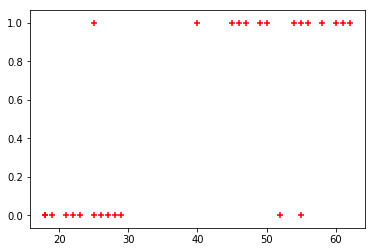

In [5]:
plt.scatter(df.age,df.bough_insurances,color='red',marker='+')

In [7]:
from sklearn.model_selection import train_test_split
df.shape


(27, 2)

In [16]:
X_train, X_test,y_train,y_test=train_test_split(df[['age']],df.bough_insurances,train_size=0.9) 
#use shift + tab to see what the fuctions are doing
#we divide the data frame into several part
#90% will be to train the model
#10% will be to test the model

C:\Users\Hugo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [17]:
X_test #10% of the variables

,age
9,61
13,29
2,47


In [18]:
X_train #90% of the variable

,age
19,18
17,58
18,19
8,62
25,54
1,25
5,56
6,55
0,22
21,26


In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
model=LogisticRegression()
model.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [20]:
model.predict(X_test)

array([1, 0, 1], dtype=int64)

In [21]:
model.score(X_test,y_test)

1.0

In [23]:
model.predict_proba(X_test) #predict the proba of an item to be in one class or the other
#first line tells the proba that the first man in X_test
#will not buy a life insurance and the second the opposite
#based on the other people with similar age in x_train

array([[ 0.18955726,  0.81044274],
       [ 0.54572728,  0.45427272],
       [ 0.32365976,  0.67634024]])

In [24]:
model.predict(25) #1 if a 25yo will buy life insurance

array([0], dtype=int64)

In [74]:
#exercise
from matplotlib import pyplot

df1=pd.read_excel('H.xlsx')



In [72]:
df1.groupby('left').mean()
#group by wether they left or no
#we can easily see wether they left for a columns or no
#we can deduce they left because of satisfaction, avg monthly hours
#and promotion

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


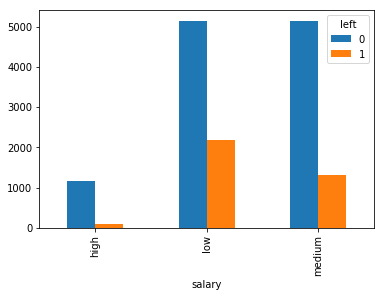

In [75]:
pd.crosstab(df1.salary,df1.left).plot(kind='bar')

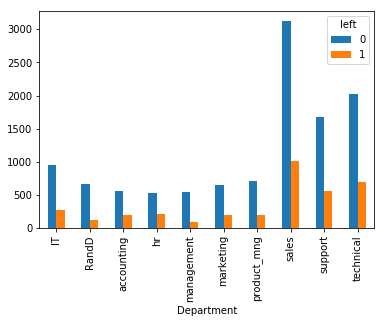

In [77]:
pd.crosstab(df1.Department,df1.left).plot(kind='bar')

In [78]:
#we only consider what we are interested in
subdf1 = df1[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [1]:
salary_dummies = pd.get_dummies(subdf1.salary, prefix="salary")
final=pd.concat([subdf1,salary_dummies],axis='columns')
final.head()
X=final.drop('salary',axis='columns')
Y=df1.left

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.3)
model.fit(X_train,y_train)
model.predict_proba(X_test)
model.predict([[0.3,40,0,1,0,0]])

NameError: name 'pd' is not defined